In [34]:
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn
! pip install xgboost
! pip install lightgbm
! pip install statsmodels
! pip install flask



In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('malicious_phish.csv')

print(df.head())

                                                 url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement


In [37]:
#f = pd.read_csv('phishing_site_urls.csv')
#print(df.head())

In [38]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [39]:
df.isnull().sum()



url     0
type    0
dtype: int64

In [40]:
df.type.value_counts

<bound method IndexOpsMixin.value_counts of 0           phishing
1             benign
2             benign
3         defacement
4         defacement
             ...    
651186      phishing
651187      phishing
651188      phishing
651189      phishing
651190      phishing
Name: type, Length: 651191, dtype: object>

In [41]:
! pip install nltk


In [42]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['tokens'] = df['url'].apply(tokenizer.tokenize)

In [43]:
df.url[0]
tokenizer.tokenize(df.url[0])


['br', 'icloud', 'com', 'br']

In [44]:
df['text_tokenized'] = df.url.map(lambda t: tokenizer.tokenize(t))
df.head()

,url,type,tokens,text_tokenized
0,br-icloud.com.br,phishing,"[br, icloud, com, br]","[br, icloud, com, br]"
1,mp3raid.com/music/krizz_kaliko.html,benign,"[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]"
2,bopsecrets.org/rexroth/cr/1.htm,benign,"[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecrets, org, rexroth, cr, 1, htm]"
3,http://www.garage-pirenne.be/index.php?option=...,defacement,"[http, www, garage, pirenne, be, index, php, o...","[http, www, garage, pirenne, be, index, php, o..."
4,http://adventure-nicaragua.net/index.php?optio...,defacement,"[http, adventure, nicaragua, net, index, php, ...","[http, adventure, nicaragua, net, index, php, ..."


In [45]:
df_phish = df[df.type=='phishing']
df_malware = df[df.type=='malware']
df_deface = df[df.type=='defacement']
df_benign = df[df.type=='benign']

In [46]:
! pip install wordcloud
from wordcloud import WordCloud

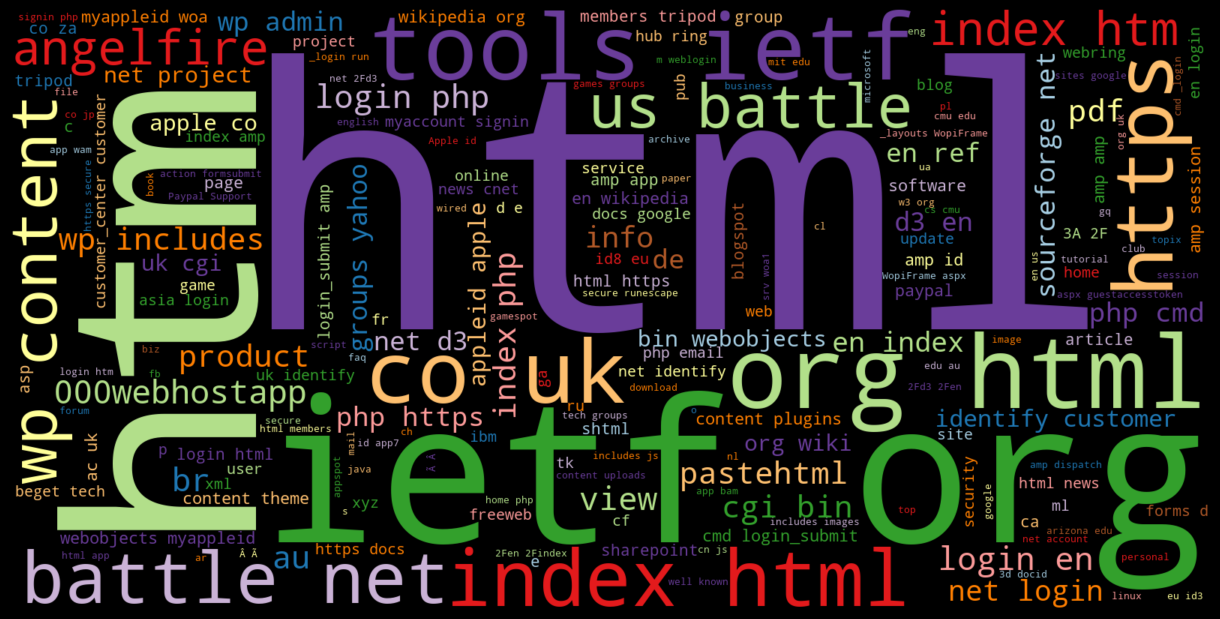

In [47]:
phish_url = " ".join(i for i in df_phish.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

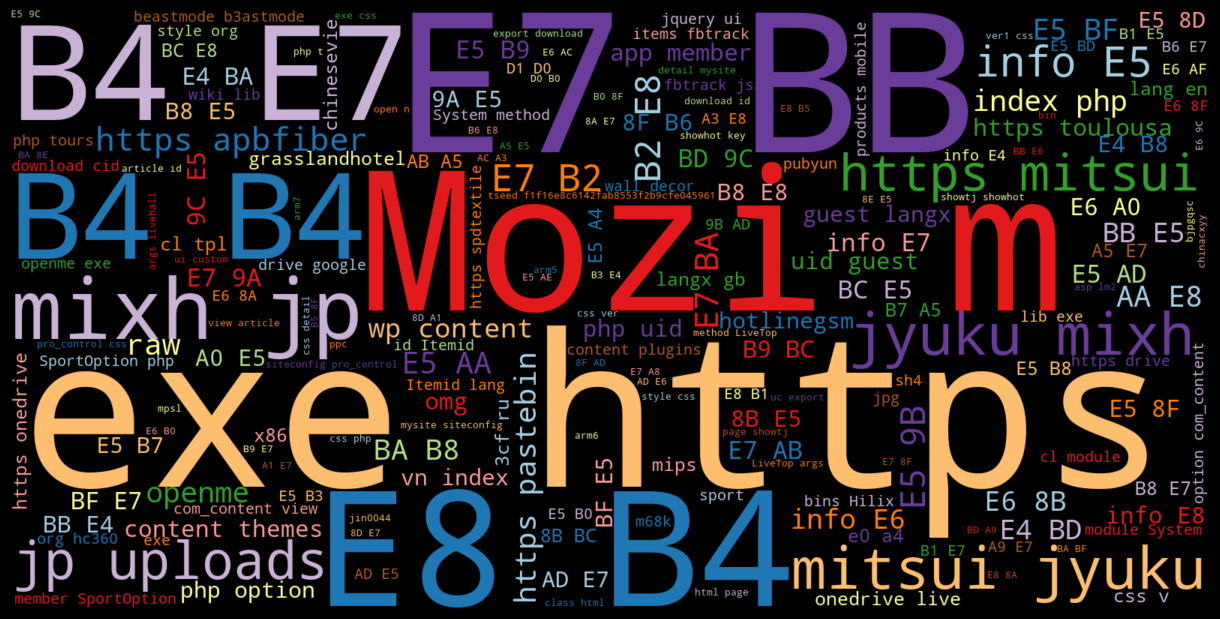

In [48]:
malware_url = " ".join(i for i in df_malware.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(malware_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [49]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
df.head()

,url,type,tokens,text_tokenized,text_stemmed
0,br-icloud.com.br,phishing,"[br, icloud, com, br]","[br, icloud, com, br]","[br, icloud, com, br]"
1,mp3raid.com/music/krizz_kaliko.html,benign,"[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]"
2,bopsecrets.org/rexroth/cr/1.htm,benign,"[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecret, org, rexroth, cr, 1, htm]"
3,http://www.garage-pirenne.be/index.php?option=...,defacement,"[http, www, garage, pirenne, be, index, php, o...","[http, www, garage, pirenne, be, index, php, o...","[http, www, garag, pirenn, be, index, php, opt..."
4,http://adventure-nicaragua.net/index.php?optio...,defacement,"[http, adventure, nicaragua, net, index, php, ...","[http, adventure, nicaragua, net, index, php, ...","[http, adventur, nicaragua, net, index, php, o..."


In [50]:
df['text'] = df['text_stemmed'].map(lambda l: ' '.join(l))
df.head()

,url,type,tokens,text_tokenized,text_stemmed,text
0,br-icloud.com.br,phishing,"[br, icloud, com, br]","[br, icloud, com, br]","[br, icloud, com, br]",br icloud com br
1,mp3raid.com/music/krizz_kaliko.html,benign,"[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]",mp3raid com music krizz_kaliko html
2,bopsecrets.org/rexroth/cr/1.htm,benign,"[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecret, org, rexroth, cr, 1, htm]",bopsecret org rexroth cr 1 htm
3,http://www.garage-pirenne.be/index.php?option=...,defacement,"[http, www, garage, pirenne, be, index, php, o...","[http, www, garage, pirenne, be, index, php, o...","[http, www, garag, pirenn, be, index, php, opt...",http www garag pirenn be index php option com_...
4,http://adventure-nicaragua.net/index.php?optio...,defacement,"[http, adventure, nicaragua, net, index, php, ...","[http, adventure, nicaragua, net, index, php, ...","[http, adventur, nicaragua, net, index, php, o...",http adventur nicaragua net index php option c...


In [51]:
df_phish = df[df.type=='phishing']
df_malware = df[df.type=='malware']
df_deface = df[df.type=='defacement']
df_benign = df[df.type=='benign']

In [52]:
df_benign.head()


,url,type,tokens,text_tokenized,text_stemmed,text
1,mp3raid.com/music/krizz_kaliko.html,benign,"[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]",mp3raid com music krizz_kaliko html
2,bopsecrets.org/rexroth/cr/1.htm,benign,"[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecret, org, rexroth, cr, 1, htm]",bopsecret org rexroth cr 1 htm
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,"[http, buzzfil, net, m, show, art, ils, etaien...","[http, buzzfil, net, m, show, art, ils, etaien...","[http, buzzfil, net, m, show, art, il, etaient...",http buzzfil net m show art il etaient loin de...
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,"[espn, go, com, nba, player, _, id, 3457, bran...","[espn, go, com, nba, player, _, id, 3457, bran...","[espn, go, com, nba, player, _, id, 3457, bran...",espn go com nba player _ id 3457 brandon rush
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,"[yourbittorrent, com, q, anthony, hamilton, so...","[yourbittorrent, com, q, anthony, hamilton, so...","[yourbittorr, com, q, anthoni, hamilton, soulif]",yourbittorr com q anthoni hamilton soulif


In [53]:
df_deface.head()

,url,type,tokens,text_tokenized,text_stemmed,text
3,http://www.garage-pirenne.be/index.php?option=...,defacement,"[http, www, garage, pirenne, be, index, php, o...","[http, www, garage, pirenne, be, index, php, o...","[http, www, garag, pirenn, be, index, php, opt...",http www garag pirenn be index php option com_...
4,http://adventure-nicaragua.net/index.php?optio...,defacement,"[http, adventure, nicaragua, net, index, php, ...","[http, adventure, nicaragua, net, index, php, ...","[http, adventur, nicaragua, net, index, php, o...",http adventur nicaragua net index php option c...
8,http://www.pashminaonline.com/pure-pashminas,defacement,"[http, www, pashminaonline, com, pure, pashminas]","[http, www, pashminaonline, com, pure, pashminas]","[http, www, pashminaonlin, com, pure, pashmina]",http www pashminaonlin com pure pashmina
11,http://www.ikenmijnkunst.nl/index.php/expositi...,defacement,"[http, www, ikenmijnkunst, nl, index, php, exp...","[http, www, ikenmijnkunst, nl, index, php, exp...","[http, www, ikenmijnkunst, nl, index, php, exp...",http www ikenmijnkunst nl index php expos expo...
13,http://www.lebensmittel-ueberwachung.de/index....,defacement,"[http, www, lebensmittel, ueberwachung, de, in...","[http, www, lebensmittel, ueberwachung, de, in...","[http, www, lebensmittel, ueberwachung, de, in...",http www lebensmittel ueberwachung de index ph...


In [54]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

In [55]:
all_text = ' '.join(df_benign['text'].tolist())

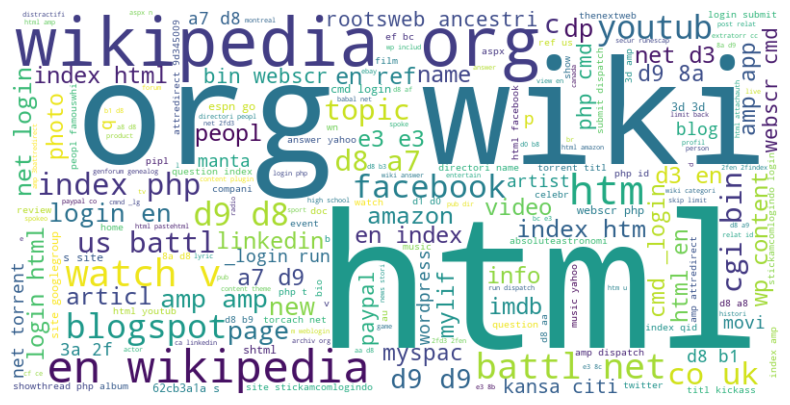

In [56]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [57]:
df.head()

,url,type,tokens,text_tokenized,text_stemmed,text
0,br-icloud.com.br,phishing,"[br, icloud, com, br]","[br, icloud, com, br]","[br, icloud, com, br]",br icloud com br
1,mp3raid.com/music/krizz_kaliko.html,benign,"[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]","[mp3raid, com, music, krizz_kaliko, html]",mp3raid com music krizz_kaliko html
2,bopsecrets.org/rexroth/cr/1.htm,benign,"[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecrets, org, rexroth, cr, 1, htm]","[bopsecret, org, rexroth, cr, 1, htm]",bopsecret org rexroth cr 1 htm
3,http://www.garage-pirenne.be/index.php?option=...,defacement,"[http, www, garage, pirenne, be, index, php, o...","[http, www, garage, pirenne, be, index, php, o...","[http, www, garag, pirenn, be, index, php, opt...",http www garag pirenn be index php option com_...
4,http://adventure-nicaragua.net/index.php?optio...,defacement,"[http, adventure, nicaragua, net, index, php, ...","[http, adventure, nicaragua, net, index, php, ...","[http, adventur, nicaragua, net, index, php, o...",http adventur nicaragua net index php option c...


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
features = cv.fit_transform(df.text)
features[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 569186))

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, df.type, test_size=0.2)


In [60]:
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression()
l_model.fit(x_train,y_train)

/Users/harshyadav/Project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
l_model.score(x_test,y_test)
l_model.score(x_train, y_train)
from sklearn.metrics import classification_report
print('\nCLASSIFICATION REPORT\n')
print(classification_report(l_model.predict(x_test), y_test,
                            target_names =['df_phish','df_malware','df_deface','df_benign']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

    df_phish       0.99      0.95      0.97     89024
  df_malware       1.00      0.99      0.99     19259
   df_deface       0.96      0.99      0.97      6322
   df_benign       0.76      0.92      0.83     15634

    accuracy                           0.95    130239
   macro avg       0.92      0.96      0.94    130239
weighted avg       0.96      0.95      0.96    130239



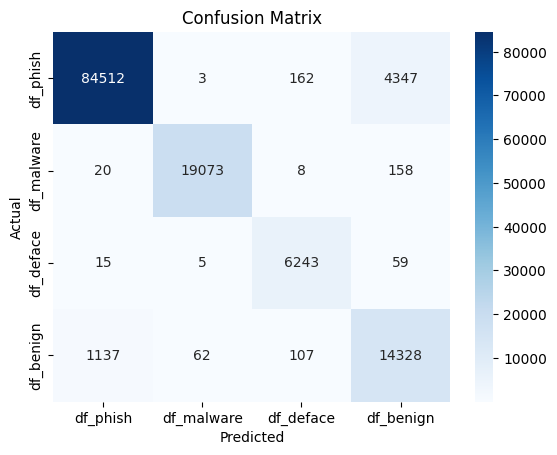

In [62]:
from sklearn.metrics import confusion_matrix
con_mat = pd.DataFrame(confusion_matrix(l_model.predict(x_test), y_test),
            columns = ['df_phish','df_malware','df_deface','df_benign'],
            index = ['df_phish','df_malware','df_deface','df_benign'])
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [63]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_test, y_test)

0.9032163944747733

In [64]:
# Classical ML Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [65]:
models = {
    "Random Forest": RandomForestClassifier()
   
}


In [ ]:
for name, model in models.items():
    
    print(f"\n🔥 Training {name}...\n")
    

    if name == "Gaussian NB":
        model.fit(x_train.toarray(), y_train)
        train_score = model.score(x_train.toarray(), y_train)
        test_score = model.score(x_test.toarray(), y_test)
        y_pred = model.predict(x_test.toarray())
    else:
        model.fit(x_train, y_train)
        train_score = model.score(x_train, y_train)
        test_score = model.score(x_test, y_test)
        y_pred = model.predict(x_test)
    
    print("Train Accuracy:", train_score)
    print("Test Accuracy:", test_score)
    
    print("\nCLASSIFICATION REPORT\n")
    print(classification_report(
        y_test, y_pred,
        target_names=['df_phish','df_malware','df_deface','df_benign']
    ))
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=['df_phish','df_malware','df_deface','df_benign'],
        yticklabels=['df_phish','df_malware','df_deface','df_benign'])
    
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



🔥 Training Random Forest...



In [ ]:
import pickle
pickle.dump(l_model, open('phishing.pkl','wb'))
pickle.dump(mnb, open('phishing_mnb.pkl','wb'))
pickle.dump(cv, open('vectorizer.pkl','wb'))
# Phishing URLs
predict_df_phish = [
'paypal-login-security-update.com/verify',
'secure-banking-login-alert.net/auth',
'account-verification-amazon-login.com',
'login-facebook-security-check.com'
]

# Malware URLs
predict_df_malware = [
'cracked-software-download.exe',
'free-movie-player-setup.exe',
'trojan-update-security-patch.exe',
'keygen-download-full-version.exe'
]

# Defacement URLs
predict_df_deface = [
'hacked-site.com/hacked-by-xyz',
'website.com/index_hacked.html',
'victimsite.org/defaced.html',
'serverbreach.net/hacked/home.html'
]

# Benign URLs
predict_df_benign = [
'youtube.com/',
'github.com/',
'wikipedia.org/',
'stackoverflow.com/'
]


In [ ]:
test_sets = {
    "Phish": predict_df_phish,
    "Malware": predict_df_malware,
    "Deface": predict_df_deface,
    "Benign": predict_df_benign
}

for name, urls in test_sets.items():
    vec = cv.transform(urls)
    print(name, "->", rf_model.predict(vec))
